# Linear Transformations and Matrices

## Table of Contents
1. [Introduction](#1-introduction)
2. [Linear Transformations in 2D](#2-linear-transformations-in-2d)
   1. [Scaling](#a-scaling)
   2. [Translation](#b-translation)
   3. [Rotation](#c-rotation)
   4. [Shear](#d-shear)
   5. [Reflection](#e-reflection)
3. [Linear Transformations in 3D](#3-linear-transformations-in-3d)
   1. [Scaling](#a-3d-scaling)
   2. [Translation](#b-3d-translation)
   3. [Rotation](#c-3d-rotation)
4. [Hierarchy of Transformations](#hierarchy-of-transformations)
5. [Examples](#examples)
   1. [2D Rotation](#example-2d-rotation)
   2. [2D Scaling](#example-2d-scaling)
   3. [2D Affine Transformation](#example-2d-affine-transformation)
   4. [3D Rotation (X-axis)](#example-3d-rotation-x-axis)
   5. [3D Rotation (Y-axis)](#example-3d-rotation-y-axis)
   6. [3D Scaling](#example-3d-scaling)
   7. [3D Translation](#exation matrix on a 2D vector.

```python
# Insert Python code here


In [1]:
import numpy as np
import pandas as pd
import math
import scipy
from matplotlib import pyplot as plt
from matplotlib import image
import sklearn

## 1. What do you mean by applying a Matrix to a Vector?
- In Linear Algebra a transformation is a function that takes a vector as input and give a vector as output.
- There are a variety of transformations, some of which are quite complex, and the most simplest one is called linear transformation.
- A linear transformation is a function from one vector space to another that respects the underlying (linear) structure of each vector space
- Visually speaking, a transformation is linear if it has two properties:
    - Lines remains lines
    - Origin remains fixed
- **Applying a matrix to a vector** (i.e., performing matrix-vector multiplication) can linearly transform the vector, e.g, rotate it or rescale it.
<h2>$$x' = Ax$$</h2>

$$i = \begin{bmatrix} 1  \\ 0 \end{bmatrix}, \hspace{2 cm}j = \begin{bmatrix} 0 \\ 1\end{bmatrix}, \hspace{2 cm}A = \begin{bmatrix} 1 & 1 \\ -1 & 1 \end{bmatrix}$$

$\hspace{2 cm}i' = Ai = \begin{bmatrix} 1 & 1 \\ -1 & 1 \end{bmatrix}\begin{bmatrix} 1  \\ 0 \end{bmatrix} = \begin{bmatrix} 1  \\ -1 \end{bmatrix}$ 

$\hspace{2 cm}j' = Aj = \begin{bmatrix} 1 & 1 \\ -1 & 1 \end{bmatrix}\begin{bmatrix} 0  \\ 1 \end{bmatrix} = \begin{bmatrix} 1  \\ 1 \end{bmatrix}$  

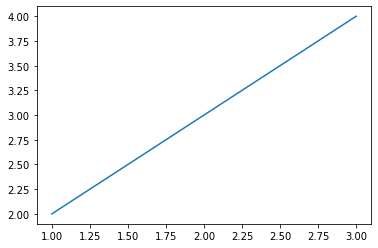

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def line_equation(point1, point2):
    # Calculate the slope (m)
    slope = (point2[1] - point1[1]) / (point2[0] - point1[0])
    
    # Calculate the y-intercept (b) using y = mx + b
    y_intercept = point1[1] - slope * point1[0]
    
    return slope, y_intercept


slope, y_intercept = line_equation(point1, point2)


x_values = np.linspace(min(point1[0], point2[0]), max(point1[0], point2[0]), 100)
y_values = slope * x_values + y_intercept

plt.plot(x_values, y_values, label=f'y = {slope}x + {y_intercept}')
y_values = slope * x_values + y_intercept +1


In [99]:
import numpy as np
import matplotlib.pyplot as plt

def line_equation(point1, point2):
    slope = (point2[1] - point1[1]) / (point2[0] - point1[0])
    y_intercept = point1[1] - slope * point1[0]
    return slope, y_intercept

def plot_linear_transformation(A, i, j):
    # Apply the matrix A to vectors i and j
    i_prime = np.dot(A, i)
    j_prime = np.dot(A, j)

    # Create a figure with subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the vectors before transformation in the first subplot
    axs[0].quiver(0, 0, i[0], i[1], angles='xy', scale_units='xy', scale=1, color='b', label='i')
    axs[0].quiver(0, 0, j[0], j[1], angles='xy', scale_units='xy', scale=1, color='r', label='j')
    axs[0].set_xlim([-2, 2])
    axs[0].set_ylim([-2, 2])
    axs[0].set_title('Before Transformation')
    axs[0].legend()

    # Plot the vectors after transformation in the second subplot
    axs[1].quiver(0, 0, i_prime[0], i_prime[1], angles='xy', scale_units='xy', scale=1, color='b', label="i'")
    axs[1].quiver(0, 0, j_prime[0], j_prime[1], angles='xy', scale_units='xy', scale=1, color='r', label="j'")
    axs[1].set_xlim([-2, 2])
    axs[1].set_ylim([-2, 2])
    axs[1].set_title('After Transformation')

    # Plot the lines resulting from linear transformations
    x_values = np.linspace(-2, 2)
    for v in range(-2, 3):
        slope, y_intercept = line_equation(np.array([0, 0]), i_prime)
        y_values = slope * x_values + y_intercept + v
        axs[1].plot(x_values, y_values, color='black', linewidth=0.5)
        slope, y_intercept = line_equation(np.array([0, 0]), j_prime)
        y_values = slope * x_values + y_intercept + v
        axs[1].plot(x_values, y_values, color='black', linewidth=0.5)

    # Set common labels for the subplots
    for ax in axs:
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.legend()

    # Add grid lines to the first subplot
    for i in range(-2, 3):
        axs[0].axhline(i, color='black', linewidth=0.5)
        axs[0].axvline(i, color='black', linewidth=0.5)

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()


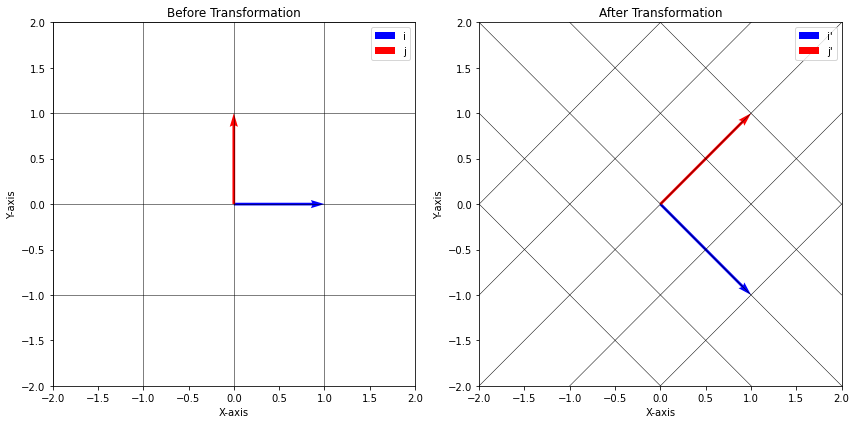

In [100]:
# Define the transformation matrix A
A = np.array([[1, 1], [-1, 1]])

# Define the basis vectors i and j
i = np.array([1, 0])
j = np.array([0, 1])

# Plot linear transformation for i and j with the specified title
plot_linear_transformation(A, i, j)


## 2. Algebra Behind Linear Transformations in 2-D Space
- A **Linear Transformation** is an affine transformation that converts points from one coordinate system to another by addition and scaling. Scaling, reflection, rotation and shear are all examples of Linear Transformations. 
- Unlike affine, in linear transformation the origin must be preserved, so translation as well as rotation about an arbitrary point is not a linear transformation.
- If you are given a 2x2 matrix and some specific vector and you want to know where that linear transformation will take that vector, you can take the coordinates of that vector, multiply that with the corresponding columns of the matrix and then add them together
- Let us practically understand linear transformation by applying a 2-D transformation matrix $A =    \begin{bmatrix} a_1 & a_2 \\  a_3 & a_4  \end{bmatrix}$ to a 2-D column vector     $\overrightarrow{v_1} = \begin{bmatrix} x_1 \\ y_1 \end{bmatrix}$:

$\hspace{7 cm}\overrightarrow{v_2} = A\overrightarrow{v_1}$

$\hspace{2 cm}
   \begin{bmatrix} x_2 \\ y_2 \end{bmatrix} = 
   \begin{bmatrix} a_1 & a_2 \\  a_3 & a_4  \end{bmatrix} 
    \begin{bmatrix} x_1 \\ y_1 \end{bmatrix}
\hspace{3 cm}
   \begin{bmatrix} x_2 \\ y_2 \\ 1\end{bmatrix} = 
   \begin{bmatrix} a_1 & a_2 & 0 \\  a_3 & a_4 & 0 \\ 0 & 0 & 1  \end{bmatrix} 
    \begin{bmatrix} x_1 \\ y_1 \\ 1\end{bmatrix}
$

$\hspace{6 cm}x_2 = a_1x_1 +a_2y_1$

$\hspace{6 cm}y_2 = a_3x_1 +a_4y_1$



> The matrix $A$ represents the **linear transformation** that takes vector $\overrightarrow{v_1} \hspace{.2 cm}(x_1, y_1)$ and transforms it into $\overrightarrow{v_2}\hspace{.2 cm} (x_2, y_2)$.

### a. Applying Identity Matrix:
$\hspace{2 cm}
   \begin{bmatrix} x_2 \\ y_2 \end{bmatrix} = 
   \begin{bmatrix} 1 & 0 \\  0 & 1   \end{bmatrix} 
    \begin{bmatrix} x_1 \\ y_1 \end{bmatrix}
$


$\hspace{2 cm} x_2 = x_1 + 0 = x_1$

$\hspace{2 cm}y_2 = 0 + y_1 = y_1$


**Example:** Apply identity matrix, $A = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}_{2x2}$ on a vector $\overrightarrow{v_1} = \begin{bmatrix} 3 \\ 1 \end{bmatrix}$. Calculate and graphically show the vector before and after the transformation.

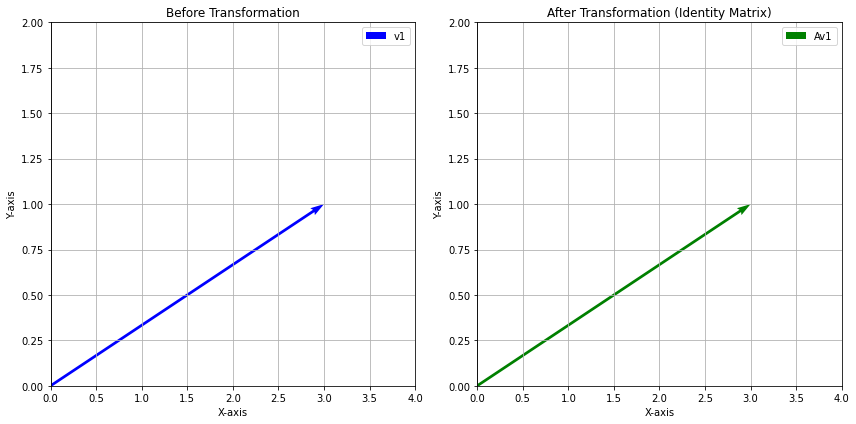

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the identity matrix A
A = np.array([[1, 0],
              [0, 1]])

# Define the vector v1
v1 = np.array([3, 1])

# Apply the matrix A to vector v1
v1_transformed = np.dot(A, v1)

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the vector v1 before transformation
axs[0].quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='b', label='v1')
axs[0].set_xlim([0, 4])
axs[0].set_ylim([0, 2])
axs[0].set_title('Before Transformation')
axs[0].legend()

# Plot the vector v1 after transformation (unchanged due to the identity matrix)
axs[1].quiver(0, 0, v1_transformed[0], v1_transformed[1], angles='xy', scale_units='xy', scale=1, color='g', label="Av1")
axs[1].set_xlim([0, 4])
axs[1].set_ylim([0, 2])
axs[1].set_title('After Transformation (Identity Matrix)')
axs[1].legend()

# Set common labels for the subplots
for ax in axs:
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.grid()
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### b. Applying a Scaling Matrix:
- Scaling is the process of expanding or compressing the dimensions of an object

$\hspace{2 cm}
   \begin{bmatrix} x_2 \\ y_2 \end{bmatrix} = 
   \begin{bmatrix} S_x & 0 \\  0 & S_y   \end{bmatrix} 
    \begin{bmatrix} x_1 \\ y_1 \end{bmatrix}
$


$\hspace{3 cm}x_2 = x_1S_x$

$\hspace{3 cm}y_2 = y_1S_y$

- Where $S_x$ is th scaling constant wrt x-direction, and $S_y$ is the scaling constant wrt y-direction.
- If $S_x = S_y$, the scaling transformation is said to be homogeneous or uniform
- If $S_x \gt 1$, it is magnification/expansion
- If $S_x \lt 1$, it is reduction/compression
- If $S_x = 1$, no effect

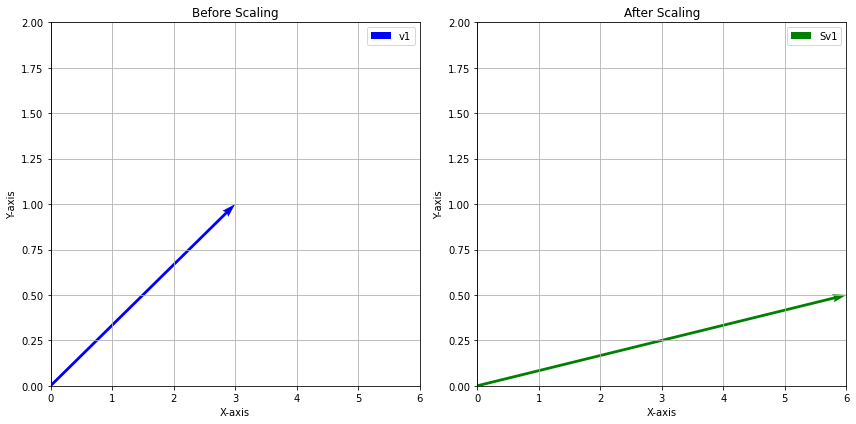

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the scaling matrix
Sx = 2  # Scaling factor along the x-direction
Sy = 0.5  # Scaling factor along the y-direction
scaling_matrix = np.array([[Sx, 0],
                           [0, Sy]])

# Define the vector v1
v1 = np.array([3, 1])

# Apply the scaling matrix to the vector
v2 = np.dot(scaling_matrix, v1)

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the vector v1 before scaling
axs[0].quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='b', label='v1')
axs[0].set_xlim([0, 6])
axs[0].set_ylim([0, 2])
axs[0].set_title('Before Scaling')
axs[0].legend()

# Plot the vector v2 after scaling
axs[1].quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='g', label="Sv1")
axs[1].set_xlim([0, 6])
axs[1].set_ylim([0, 2])
axs[1].set_title('After Scaling')
axs[1].legend()

# Set common labels for the subplots
for ax in axs:
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.grid()
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Case 1: Homogeneous Scaling (Uniform)
When \(S_x = S_y\), the scaling transformation is homogeneous or uniform. This means that the object is uniformly scaled in both the x and y directions.



Original Vector v1: [3 1]
Scaled Vector v2: [4.5 1.5]


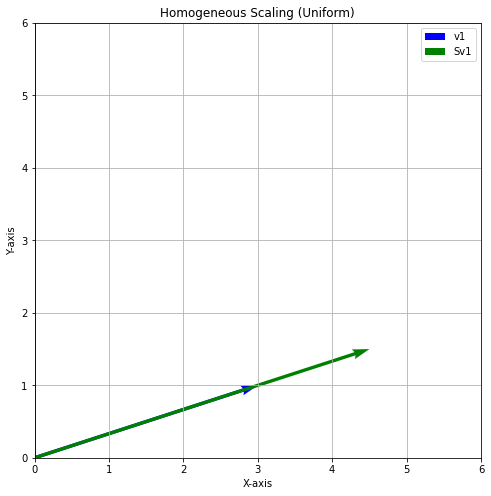

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Homogeneous Scaling
S = 1.5
scaling_matrix = np.array([[S, 0],
                           [0, S]])

# Define the vector v1
v1 = np.array([3, 1])

# Apply the scaling matrix to the vector
v2 = np.dot(scaling_matrix, v1)

# Print the results
print("Original Vector v1:", v1)
print("Scaled Vector v2:", v2)

# Visualization
plt.figure(figsize=(8, 8))
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='b', label='v1')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='g', label="Sv1")
plt.xlim([0, 6])
plt.ylim([0, 6])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Homogeneous Scaling (Uniform)')
plt.legend()
plt.show()


### Case 2: Magnification/Expansion
When \(S_x > 1\), it is magnification or expansion. 

Original Vector v1: [3 1]
Scaled Vector v2: [6 2]


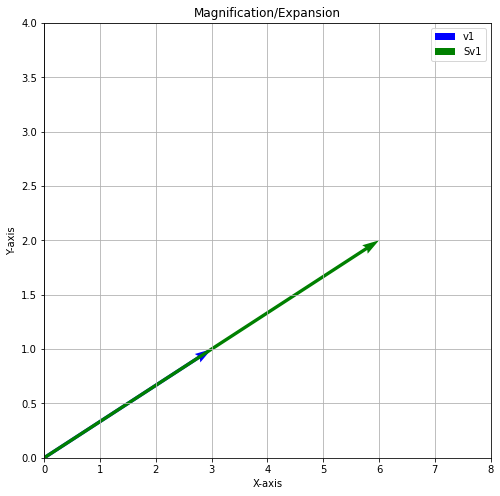

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Magnification/Expansion
S = 2
scaling_matrix = np.array([[S, 0],
                           [0, S]])

# Define the vector v1
v1 = np.array([3, 1])

# Apply the scaling matrix to the vector
v2 = np.dot(scaling_matrix, v1)

# Print the results
print("Original Vector v1:", v1)
print("Scaled Vector v2:", v2)

# Visualization
plt.figure(figsize=(8, 8))
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='b', label='v1')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='g', label="Sv1")
plt.xlim([0, 8])
plt.ylim([0, 4])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Magnification/Expansion')
plt.legend()
plt.show()


### Case 3: Reduction/Compression
When \(S_x < 1\), it is reduction or compression.

Original Vector v1: [3 1]
Scaled Vector v2: [1.5 0.5]


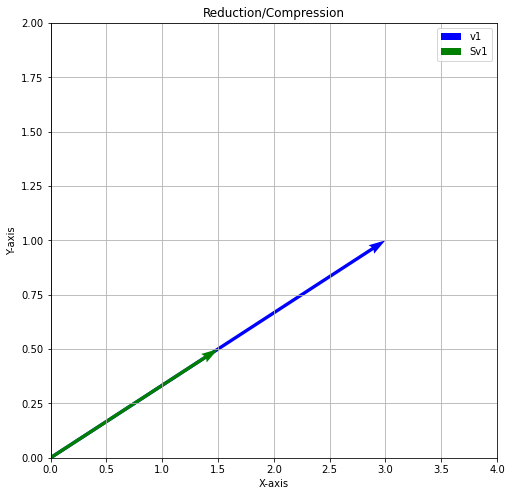

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Reduction/Compression
S = 0.5
scaling_matrix = np.array([[S, 0],
                           [0, S]])

# Define the vector v1
v1 = np.array([3, 1])

# Apply the scaling matrix to the vector
v2 = np.dot(scaling_matrix, v1)

# Print the results
print("Original Vector v1:", v1)
print("Scaled Vector v2:", v2)

# Visualization
plt.figure(figsize=(8, 8))
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='b', label='v1')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='g', label="Sv1")
plt.xlim([0, 4])
plt.ylim([0, 2])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Reduction/Compression')
plt.legend()
plt.show()


### Case 4: No Effect
When \(S_x = 1\), there is no effect on the vector.

Original Vector v1: [3 1]
Scaled Vector v2: [3 1]


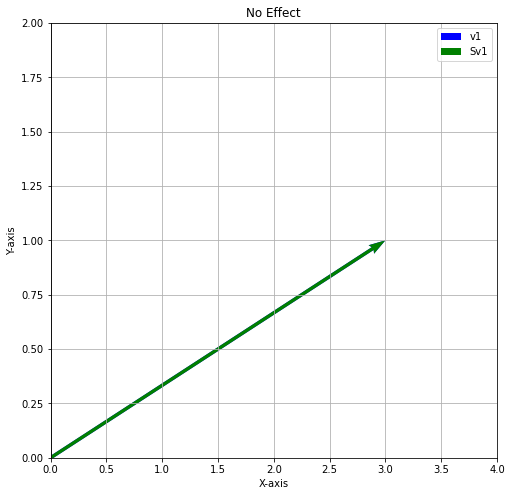

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# No Effect
S = 1
scaling_matrix = np.array([[S, 0],
                           [0, S]])

# Define the vector v1
v1 = np.array([3, 1])

# Apply the scaling matrix to the vector
v2 = np.dot(scaling_matrix, v1)

# Print the results
print("Original Vector v1:", v1)
print("Scaled Vector v2:", v2)

# Visualization
plt.figure(figsize=(8, 8))
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='b', label='v1')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='g', label="Sv1")
plt.xlim([0, 4])
plt.ylim([0, 2])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('No Effect')
plt.legend()
plt.show()


**Example:** Apply scaling matrix, $A = \begin{bmatrix} 2 & 0 \\ 0 & 4 \end{bmatrix}_{2x2}$ on a vector $\overrightarrow{v_1} = \begin{bmatrix} 3 \\ 1 \end{bmatrix}$. Calculate and graphically show the vector before and after the transformation.

Original Vector v1: [3 1]
Scaled Vector v2: [6 4]


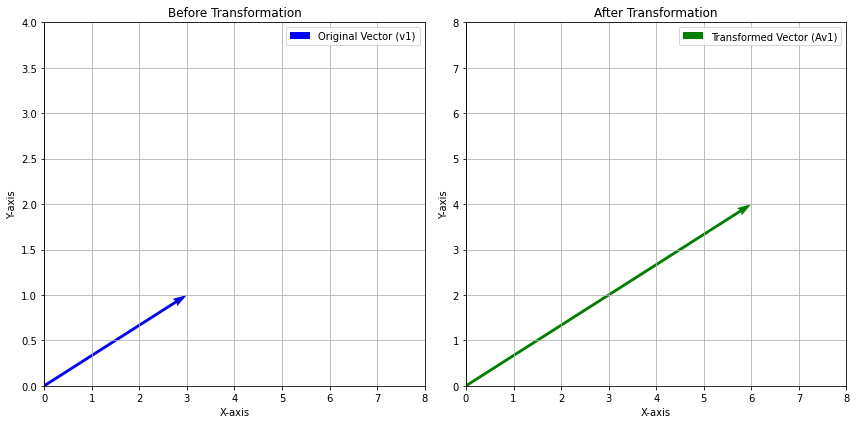

In [24]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[2, 0],
              [0, 4]])

v1 = np.array([3, 1])

v2 = np.dot(A, v1)

print("Original Vector v1:", v1)
print("Scaled Vector v2:", v2)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original vector v1
axs[0].quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='b', label='Original Vector (v1)')
axs[0].set_xlim([0, 8])
axs[0].set_ylim([0, 4])
axs[0].set_xlabel('X-axis')
axs[0].set_ylabel('Y-axis')
axs[0].grid()
axs[0].axhline(0, color='black', linewidth=0.5)
axs[0].axvline(0, color='black', linewidth=0.5)
axs[0].set_title('Before Transformation')
axs[0].legend()

axs[1].quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='g', label="Transformed Vector (Av1)")
axs[1].set_xlim([0, 8])
axs[1].set_ylim([0, 8])
axs[1].set_xlabel('X-axis')
axs[1].set_ylabel('Y-axis')
axs[1].grid()
axs[1].axhline(0, color='black', linewidth=0.5)
axs[1].axvline(0, color='black', linewidth=0.5)
axs[1].set_title('After Transformation')
axs[1].legend()

plt.tight_layout()

plt.show()


> Applying inverse of scaling matrix, $A = \begin{bmatrix} 2 & 0 \\ 0 & 4 \end{bmatrix}$ on the transformed vector $\overrightarrow{v_2} = \begin{bmatrix} 6 \\ 4 \end{bmatrix}$, will undo the effect of transformation and give you $\overrightarrow{v_1}$.
$$A^{-1}v_2 = \begin{bmatrix} 0.5 & 0 \\ 0 & 0.25 \end{bmatrix}\begin{bmatrix} 6 \\ 4 \end{bmatrix}= \begin{bmatrix} 3 \\ 1 \end{bmatrix} = \overrightarrow{v_1}$$

Original Vector v1: [3. 1.]


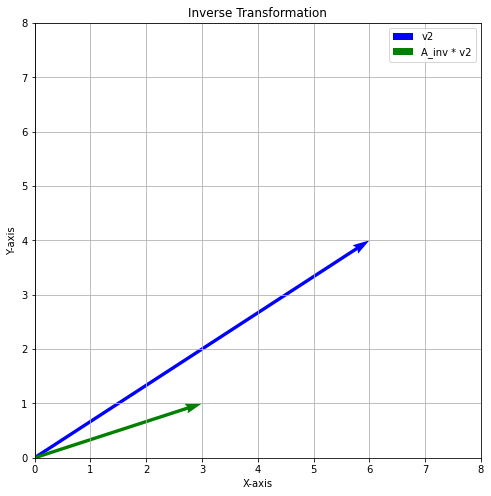

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Define the scaling matrix A
A = np.array([[2, 0],
              [0, 4]])

# Define the transformed vector v2
v2 = np.array([6, 4])

# Calculate the inverse of the scaling matrix
A_inv = np.linalg.inv(A)

# Apply the inverse transformation to v2
v1 = np.dot(A_inv, v2)

# Print the results
print("Original Vector v1:", v1)

# Visualization
plt.figure(figsize=(8, 8))
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='b', label='v2')
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='g', label="A_inv * v2")
plt.xlim([0, 8])
plt.ylim([0, 8])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Inverse Transformation')
plt.legend()
plt.show()


### c. Applying a Reflection Matrix:
- If either x-axis or y-axis is treated as mirror, the object has a mirror image or reflects

- **Reflection about x-axis:**

$\hspace{2 cm}
   \begin{bmatrix} x_2 \\ y_2 \end{bmatrix} = 
   \begin{bmatrix} 1 & 0 \\  0 & -1   \end{bmatrix} 
    \begin{bmatrix} x_1 \\ y_1 \end{bmatrix}
$


$\hspace{3 cm}x_2 = x_1$

$\hspace{3 cm}y_2 = -y_1$

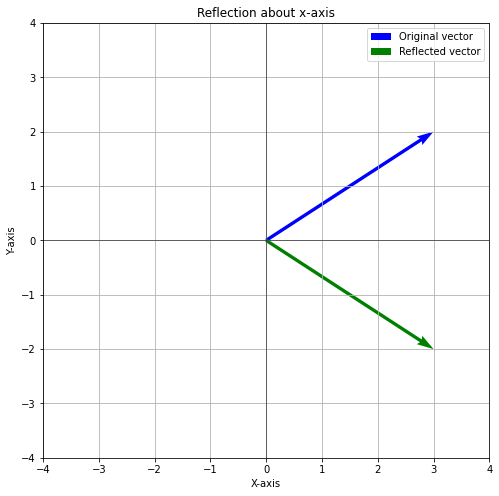

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# Reflection matrix about x-axis
A_reflection_x = np.array([[1, 0],
                            [0, -1]])

# Original vector
v1 = np.array([3, 2])

# Apply the reflection matrix
v2_reflection_x = np.dot(A_reflection_x, v1)

# Visualization
plt.figure(figsize=(8, 8))
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='b', label='Original vector')
plt.quiver(0, 0, v2_reflection_x[0], v2_reflection_x[1], angles='xy', scale_units='xy', scale=1, color='g', label="Reflected vector")
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Reflection about x-axis')
plt.legend()
plt.show()


- **Reflection about y-axis:**

$\hspace{2 cm}
   \begin{bmatrix} x_2 \\ y_2 \end{bmatrix} = 
   \begin{bmatrix} -1 & 0 \\  0 & 1   \end{bmatrix} 
    \begin{bmatrix} x_1 \\ y_1 \end{bmatrix}
$


$\hspace{3 cm}x_2 = -x_1$

$\hspace{3 cm}y_2 = y_1$


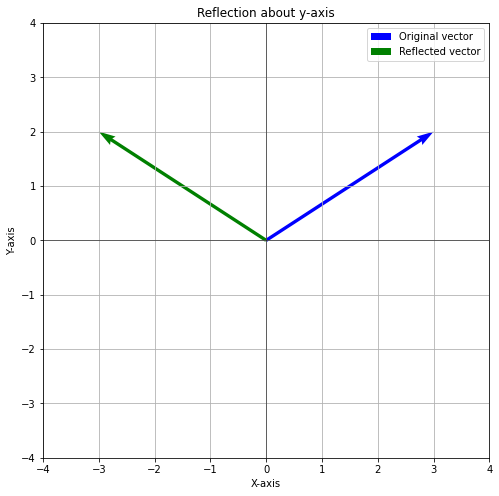

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Reflection matrix about y-axis
A_reflection_y = np.array([[-1, 0],
                            [0, 1]])

# Original vector
v1 = np.array([3, 2])

# Apply the reflection matrix
v2_reflection_y = np.dot(A_reflection_y, v1)

# Visualization
plt.figure(figsize=(8, 8))
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='b', label='Original vector')
plt.quiver(0, 0, v2_reflection_y[0], v2_reflection_y[1], angles='xy', scale_units='xy', scale=1, color='g', label="Reflected vector")
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Reflection about y-axis')
plt.legend()
plt.show()


- **Reflection about Diagonal:**

$\hspace{2 cm}
   \begin{bmatrix} x_2 \\ y_2 \end{bmatrix} = 
   \begin{bmatrix} -1 & 0 \\  0 & -1   \end{bmatrix} 
    \begin{bmatrix} x_1 \\ y_1 \end{bmatrix}
$


$\hspace{3 cm}x_2 = -x_1$

$\hspace{3 cm}y_2 = -y_1$

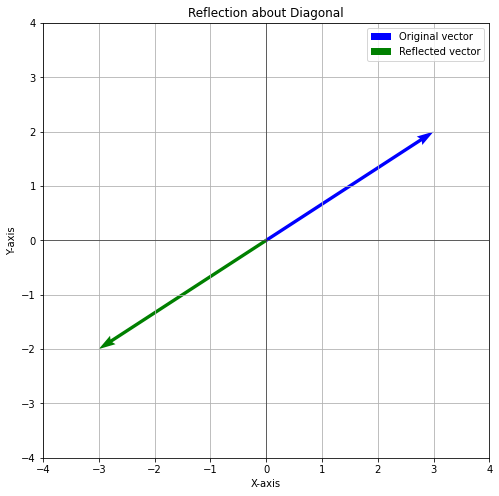

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# Reflection matrix about diagonal
A_reflection_diagonal = np.array([[-1, 0],
                                   [0, -1]])

# Original vector
v1 = np.array([3, 2])

# Apply the reflection matrix
v2_reflection_diagonal = np.dot(A_reflection_diagonal, v1)

# Visualization
plt.figure(figsize=(8, 8))
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='b', label='Original vector')
plt.quiver(0, 0, v2_reflection_diagonal[0], v2_reflection_diagonal[1], angles='xy', scale_units='xy', scale=1, color='g', label="Reflected vector")
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Reflection about Diagonal')
plt.legend()
plt.show()


**Example:** Apply reflection matrix, $A = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}_{2x2}$ on a vector $\overrightarrow{v_1} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}$. Calculate and graphically show the vector before and after the transformation.

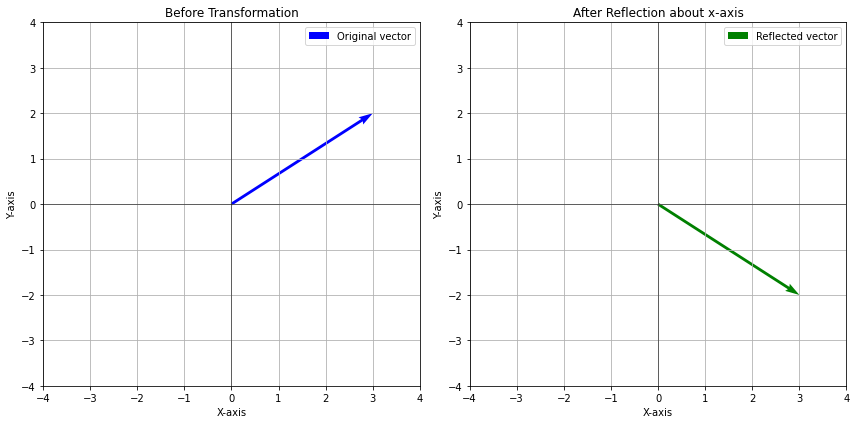

In [106]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vector(ax, vector, color, label):
    ax.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=color, label=label)
    ax.set_xlim([-4, 4])
    ax.set_ylim([-4, 4])
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.grid()
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)

# Reflection matrix about x-axis
A_reflection_x = np.array([[1, 0],
                            [0, -1]])

# Original vector
v1 = np.array([3, 2])

# Apply the reflection matrix
v2_reflection_x = np.dot(A_reflection_x, v1)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot original vector
plot_vector(axs[0], v1, 'b', 'Original vector')

# Plot reflected vector
plot_vector(axs[1], v2_reflection_x, 'g', 'Reflected vector')

# Title and legend for subplots
axs[0].set_title('Before Transformation')
axs[0].legend()
axs[1].set_title('After Reflection about x-axis')
axs[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### d. Applying a Shear Matrix:
- The Shear transformation cause the object to slant.

- **Shear in x-direction:** The x-shear maintains the y-coordinate but changes the x-coordinate, which causes the horizontal lines to tilt up or down
$\hspace{2 cm}\begin{bmatrix} x_2 \\ y_2 \end{bmatrix} = \begin{bmatrix} 1 & s_x \\  0 & 1   \end{bmatrix} \begin{bmatrix} x_1 \\ y_1 \end{bmatrix}
$


$\hspace{3 cm}x_2 = x_1 + s_x y_1$

$\hspace{3 cm}y_2 = y_1$

Original Vector v1: [3 2]
Sheared Vector v2: [5 2]


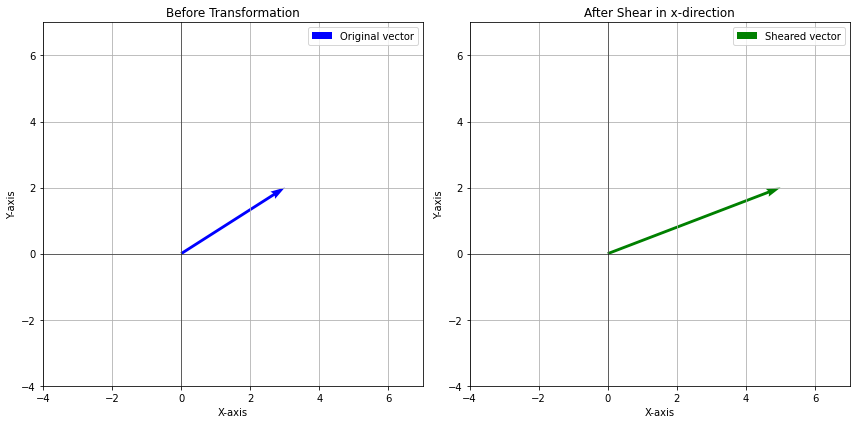

In [109]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vector(ax, vector, color, label):
    ax.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=color, label=label)
    ax.set_xlim([-4, 7])
    ax.set_ylim([-4, 7])
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.grid()
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)

# Shear matrix in x-direction
A_shear_x = np.array([[1, 1],
                      [0, 1]])

# Original vector
v1 = np.array([3, 2])

# Apply the shear matrix
v2_shear_x = np.dot(A_shear_x, v1)

# Print original and sheared vectors
print("Original Vector v1:", v1)
print("Sheared Vector v2:", v2_shear_x)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot original vector
plot_vector(axs[0], v1, 'b', 'Original vector')

# Plot sheared vector
plot_vector(axs[1], v2_shear_x, 'g', 'Sheared vector')

# Title and legend for subplots
axs[0].set_title('Before Transformation')
axs[0].legend()
axs[1].set_title('After Shear in x-direction')
axs[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


- **Shear in y-direction:** The y-shear maintains the x-coordinate but changes the y-coordinate, which causes the vertical lines to tilt up or down
$\hspace{2 cm}
   \begin{bmatrix} x_2 \\ y_2 \end{bmatrix} = 
   \begin{bmatrix} 1 & 0 \\  s_y & 1   \end{bmatrix} 
    \begin{bmatrix} x_1 \\ y_1 \end{bmatrix}
$


$\hspace{3 cm}x_2 = x_1$

$\hspace{3 cm}y_2 = S_y x_1 + y_1$

Original Vector v1: [3 2]
Sheared Vector v2: [3 5]


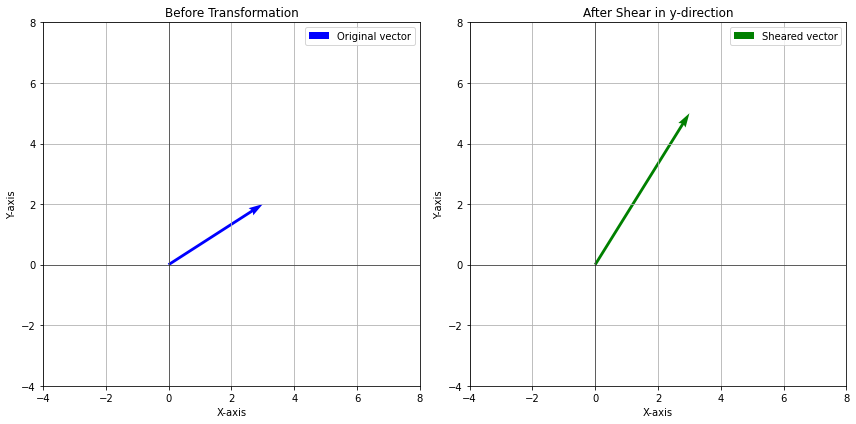

In [111]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vector(ax, vector, color, label):
    ax.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=color, label=label)
    ax.set_xlim([-4, 8])
    ax.set_ylim([-4, 8])
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.grid()
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)

# Shear matrix in y-direction
A_shear_y = np.array([[1, 0],
                      [1, 1]])

# Original vector
v1 = np.array([3, 2])

# Apply the shear matrix
v2_shear_y = np.dot(A_shear_y, v1)

# Print original and sheared vectors
print("Original Vector v1:", v1)
print("Sheared Vector v2:", v2_shear_y)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot original vector
plot_vector(axs[0], v1, 'b', 'Original vector')

# Plot sheared vector
plot_vector(axs[1], v2_shear_y, 'g', 'Sheared vector')

# Title and legend for subplots
axs[0].set_title('Before Transformation')
axs[0].legend()
axs[1].set_title('After Shear in y-direction')
axs[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


**Example:** Apply x-shear matrix, $A = \begin{bmatrix} 1 & 3 \\ 0 & 1 \end{bmatrix}_{2x2}$ on a vector $\overrightarrow{v_1} = \begin{bmatrix} 2 \\ 2 \end{bmatrix}$. Calculate and graphically show the vector before and after the transformation.

Original Vector v1: [2 2]
Sheared Vector v2: [8 2]


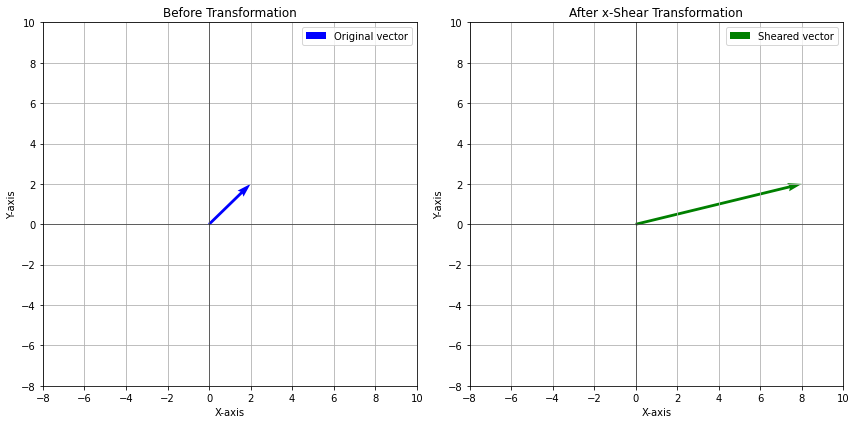

In [114]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vector(ax, vector, color, label):
    ax.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=color, label=label)
    ax.set_xlim([-8, 10])
    ax.set_ylim([-8, 10])
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.grid()
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)

# Shear matrix in x-direction
A_shear_x = np.array([[1, 3],
                      [0, 1]])

# Original vector
v1 = np.array([2, 2])

# Apply the shear matrix
v2_shear_x = np.dot(A_shear_x, v1)

# Print original and sheared vectors
print("Original Vector v1:", v1)
print("Sheared Vector v2:", v2_shear_x)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot original vector
plot_vector(axs[0], v1, 'b', 'Original vector')

# Plot sheared vector
plot_vector(axs[1], v2_shear_x, 'g', 'Sheared vector')

# Title and legend for subplots
axs[0].set_title('Before Transformation')
axs[0].legend()
axs[1].set_title('After x-Shear Transformation')
axs[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### e. Applying a Rotation Matrix:
- The process of rotating an object with respect to an angle in a two-dimensional plane is 2D rotation. We accomplish this rotation with the help of a 2 x 2 rotation matrix that has the standard form.
- The **counter clockwise rotation matrix** in 2-D is given as:

$\hspace{2 cm}  R =  \begin{bmatrix} cos\theta & -sin\theta  \\ sin\theta & cos\theta  \end{bmatrix} $

- The **clockwise rotation matrix** in 2-D is given as:

$\hspace{2 cm}   R^T = \begin{bmatrix} cos(-\theta) & -sin(-\theta)  \\ sin(-\theta) & cos(-\theta)  \end{bmatrix}  = 
\begin{bmatrix} cos\theta & sin\theta  \\ -sin\theta & cos\theta  \end{bmatrix} $

- Let us apply a counter clockwise rotation matrix to a 2-D vector:

$\hspace{2 cm}
   \begin{bmatrix} x_2 \\ y_2 \end{bmatrix} = 
   \begin{bmatrix} cos\theta & -sin\theta  \\ sin\theta & cos\theta  \end{bmatrix} 
    \begin{bmatrix} x_1 \\ y_1 \end{bmatrix}
$

$\hspace{3 cm}x_2 = x_1cos\theta - y_1sin\theta$

$\hspace{3 cm}y_2 = x_1sin\theta + y_1cos\theta$

Original Vector v1: [1 1]
Rotated Vector v2 (Counter Clockwise): [0.         1.41421356]


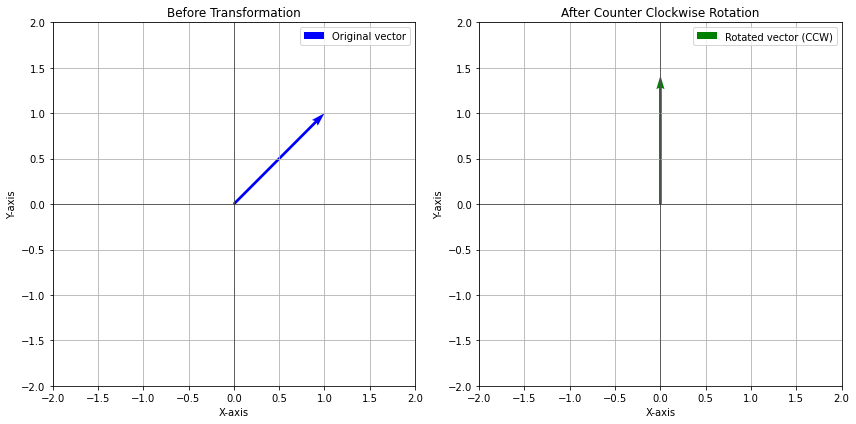

In [115]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vector(ax, vector, color, label):
    ax.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=color, label=label)
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.grid()
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)

# Rotation matrix for counter-clockwise rotation
theta = np.pi/4  # 45 degrees
R_ccw = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])

# Original vector
v1 = np.array([1, 1])

# Apply the rotation matrix
v2_ccw = np.dot(R_ccw, v1)

# Print original and rotated vectors
print("Original Vector v1:", v1)
print("Rotated Vector v2 (Counter Clockwise):", v2_ccw)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot original vector
plot_vector(axs[0], v1, 'b', 'Original vector')

# Plot rotated vector (counter-clockwise)
plot_vector(axs[1], v2_ccw, 'g', 'Rotated vector (CCW)')

# Title and legend for subplots
axs[0].set_title('Before Transformation')
axs[0].legend()
axs[1].set_title('After Counter Clockwise Rotation')
axs[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


**Example:**  If $\overrightarrow{v_1} = \begin{bmatrix} 2 \\ 3 \end{bmatrix}$ is rotated in the **counter clockwise direction** by 90 degrees, what are the coordinate values of new vector $\overrightarrow{v_2}$?

In [116]:
import numpy as np

# Given vector v1
v1 = np.array([2, 3])

# Rotation matrix for counter-clockwise rotation by 90 degrees
theta = np.radians(90)
R_ccw = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])

# Apply the rotation matrix to get v2
v2_ccw = np.dot(R_ccw, v1)

# Print the rotated vector v2
print("Original Vector v1:", v1)
print("Rotated Vector v2 (Counter Clockwise):", v2_ccw)


Original Vector v1: [2 3]
Rotated Vector v2 (Counter Clockwise): [-3.  2.]


Rotation matrix A:
 [[ 6.123234e-17 -1.000000e+00]
 [ 1.000000e+00  6.123234e-17]]
Original Vector v1: [2 3]
Rotated Vector v2 (Counter Clockwise): [-3.  2.]


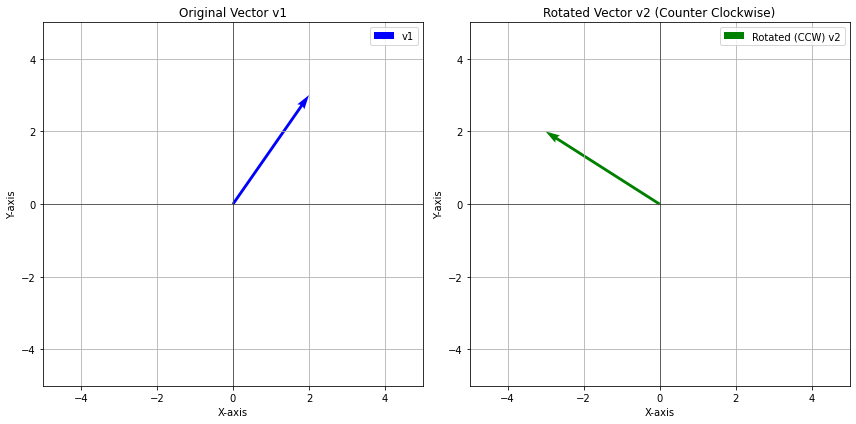

In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Given vector v1
v1 = np.array([2, 3])

# Rotation matrix for counter-clockwise rotation by 90 degrees
theta = np.radians(90)
R_ccw = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])

# Apply the rotation matrix to get v2
v2_ccw = np.dot(R_ccw, v1)

# Print the rotated vector v2
print("Rotation matrix A:\n",R_ccw)
print("Original Vector v1:", v1)
print("Rotated Vector v2 (Counter Clockwise):", v2_ccw)


# Create a figure and axis
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original vector v1
axs[0].quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='b', label='v1')
axs[0].set_xlim([-5, 5])
axs[0].set_ylim([-5, 5])
axs[0].set_title('Original Vector v1')
axs[0].legend()

# Plot the rotated vector v2 (Counter Clockwise)
axs[1].quiver(0, 0, v2_ccw[0], v2_ccw[1], angles='xy', scale_units='xy', scale=1, color='g', label="Rotated (CCW) v2")
axs[1].set_xlim([-5, 5])
axs[1].set_ylim([-5, 5])
axs[1].set_title('Rotated Vector v2 (Counter Clockwise)')
axs[1].legend()

# Set common labels for the subplots
for ax in axs:
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.grid()
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


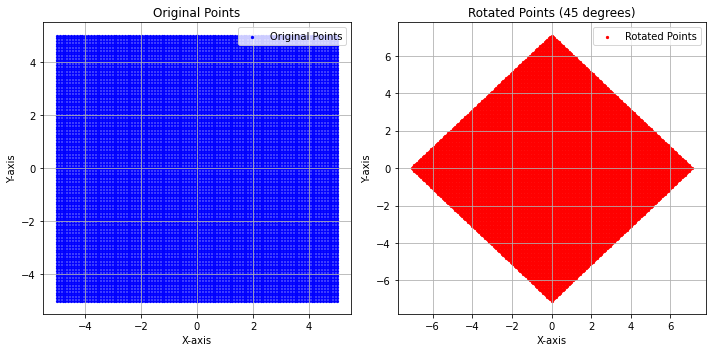

In [121]:
import numpy as np
import matplotlib.pyplot as plt

# Function to apply rotation matrix to a set of points
def rotate_points(points, angle_degrees):
    # Convert angle to radians
    theta = np.radians(angle_degrees)
    
    # Rotation matrix
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                                [np.sin(theta), np.cos(theta)]])
    
    # Apply rotation to each point
    rotated_points = np.dot(points, rotation_matrix)
    
    return rotated_points

# Generate a grid of points in the 2-D plane
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
points = np.vstack([X.flatten(), Y.flatten()]).T

# Apply rotation matrix to all points (45 degrees counter-clockwise)
rotated_points = rotate_points(points, 45)

# Plot original and rotated points
plt.figure(figsize=(10, 5))

# Plot original points
plt.subplot(1, 2, 1)
plt.scatter(points[:, 0], points[:, 1], s=5, c='b', label='Original Points')
plt.title('Original Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.legend()

# Plot rotated points
plt.subplot(1, 2, 2)
plt.scatter(rotated_points[:, 0], rotated_points[:, 1], s=5, c='r', label='Rotated Points')
plt.title('Rotated Points (45 degrees)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


### f. Applying a Translation Matrix:
$$
\overrightarrow{v_2} = A\overrightarrow{v_1} + t
$$

$$
   \begin{bmatrix} x_2 \\ y_2 \end{bmatrix} = 
   \begin{bmatrix} 1 & 0 \\  0 & 1  \end{bmatrix} 
    \begin{bmatrix} x_1 \\ y_1 \end{bmatrix} +
    \begin{bmatrix} t_x \\ t_y \end{bmatrix}
$$



$$
   \begin{bmatrix} x_2 \\ y_2 \\ 1\end{bmatrix} = 
   \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \\ 0 & 0 & 1  \end{bmatrix} 
    \begin{bmatrix} x_1 \\ y_1 \\ 1\end{bmatrix}
$$


$\hspace{10 cm}x_2 = x_1 + t_x$

$\hspace{10 cm}y_2 = x_1 + t_y$

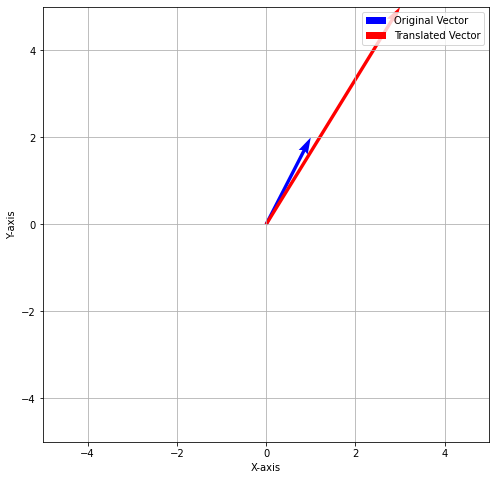

In [123]:
import numpy as np
import matplotlib.pyplot as plt

def apply_translation(matrix, vector):
    # Add homogeneous coordinate
    vector_homogeneous = np.append(vector, 1)
    
    # Apply translation matrix
    transformed_vector = np.dot(matrix, vector_homogeneous)
    
    # Return the resulting vector
    return transformed_vector[:2]

def plot_translation(matrix, original_vector, translated_vector):
    # Create a figure
    plt.figure(figsize=(8, 8))
    
    # Plot the original vector
    plt.quiver(*original_vector, angles='xy', scale_units='xy', scale=1, color='b', label='Original Vector')
    
    # Plot the translated vector
    plt.quiver(*translated_vector, angles='xy', scale_units='xy', scale=1, color='r', label='Translated Vector')
    
    # Set plot limits
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    
    # Add grid
    plt.grid(True)
    
    # Add labels and legend
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    
    # Show the plot
    plt.show()

# Define translation values
t_x = 2
t_y = 3

# Create translation matrix
translation_matrix = np.array([[1, 0, t_x],
                               [0, 1, t_y],
                               [0, 0, 1]])

# Define the original vector
original_vector = np.array([1, 2])

# Apply translation matrix to the vector
translated_vector = apply_translation(translation_matrix, original_vector)

# Plot the original and translated vectors
plot_translation(translation_matrix[:2, :2], original_vector, translated_vector)


### g. Apply Multiple Transformations Simultaneously
- A single matrix can apply multiple affine transforms simultaneously. 
- Let us apply scaling and then rotation on a 2-D plane.
- Remember, the order is important, as the output image will be different if you rotate first and then scale.
- Let us understand this practically:

**Example:** Apply two transformations: Scaling and then rotation`

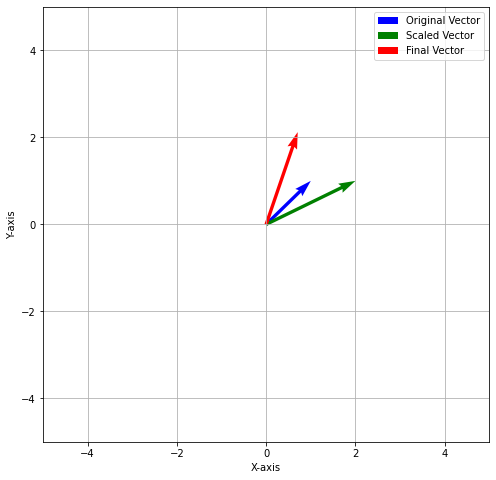

In [125]:
import numpy as np
import matplotlib.pyplot as plt

def apply_scaling(matrix, vector):
    # Apply scaling matrix
    scaled_vector = np.dot(matrix, vector)
    return scaled_vector

def apply_rotation(matrix, vector):
    # Apply rotation matrix
    rotated_vector = np.dot(matrix, vector)
    return rotated_vector

def plot_scaling_and_rotation(scaling_matrix, rotation_matrix, original_vector):
    # Apply scaling
    scaled_vector = apply_scaling(scaling_matrix, original_vector)
    
    # Apply rotation to the scaled vector
    final_vector = apply_rotation(rotation_matrix, scaled_vector)

    # Create a figure
    plt.figure(figsize=(8, 8))
    
    # Plot the original vector
    plt.quiver(*original_vector, angles='xy', scale_units='xy', scale=1, color='b', label='Original Vector')
    
    # Plot the scaled vector
    plt.quiver(*scaled_vector, angles='xy', scale_units='xy', scale=1, color='g', label='Scaled Vector')
    
    # Plot the final vector after scaling and rotation
    plt.quiver(*final_vector, angles='xy', scale_units='xy', scale=1, color='r', label='Final Vector')
    
    # Set plot limits
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    
    # Add grid
    plt.grid(True)
    
    # Add labels and legend
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    
    # Show the plot
    plt.show()

# Define scaling matrix
scaling_matrix = np.array([[2, 0],
                           [0, 1]])

# Define rotation matrix (45 degrees)
theta = 45 * np.pi / 180
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                            [np.sin(theta), np.cos(theta)]])

# Define the original vector
original_vector = np.array([1, 1])

# Plot the original, scaled, and final vectors after scaling and rotation
plot_scaling_and_rotation(scaling_matrix, rotation_matrix, original_vector)


## 3. Scaling, Translation and Rotation in Three Dimensional Space
- A 3-D Linear Transformation matrix is shown below:<br><br>

$\hspace{3 cm}
  A\hspace{.5 cm}=\hspace{.5 cm} \begin{bmatrix} a_{11} & a_{12} & a_{13} \\  a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33}  \end{bmatrix} 
  \hspace{.5 cm}=\hspace{.5 cm}
  \begin{bmatrix} a_{11} & a_{12} & a_{13} & 0\\  a_{21} & a_{22} & a_{23} & 0 \\ a_{31} & a_{32} & a_{33}  & 0 \\ 0&0&0&1 \end{bmatrix} 
$

$\hspace{4 cm}\overrightarrow{v_2} \hspace{.5 cm}=\hspace{.5 cm} A\overrightarrow{v_1}$



$\hspace{3 cm}
   \begin{bmatrix} x_2 \\ y_2 \\z_2\end{bmatrix} \hspace{.5 cm}= \hspace{.5 cm}
   \begin{bmatrix} a_{11} & a_{12} & a_{13} \\  a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33} \end{bmatrix} 
    \begin{bmatrix} x_1 \\ y_1 \\ z_1\end{bmatrix}
\hspace{3 cm}
   \begin{bmatrix} x_2 \\ y_2 \\ z_2 \\ 1\end{bmatrix} \hspace{.5 cm}= \hspace{.5 cm}
\begin{bmatrix} a_{11} & a_{12} & a_{13} & 0\\  a_{21} & a_{22} & a_{23} & 0 \\ a_{31} & a_{32} & a_{33}  & 0 \\ 0&0&0&1 \end{bmatrix}
    \begin{bmatrix} x_1 \\ y_1 \\ z_1\\ 1\end{bmatrix}
$


$\hspace{2 cm}x_2 = a_{11}x_1 + a_{12}y_1 + a_{13}z_1$

$\hspace{2 cm}y_2 = a_{21}x_1 + a_{22}y_1 + a_{23}z_1$

$\hspace{2 cm}z_2 = a_{31}x_1 + a_{32}y_1 + a_{33}z_1$


> The matrix $A$ represents the **linear transformation** that takes vector $\overrightarrow{v_1} \hspace{.2 cm}(x_1, y_1,z_1)$ and transforms it into $\overrightarrow{v_2}\hspace{.2 cm} (x_2, y_2, z_2)$.

# a. Scaling in 3D:

**3-D Scaling:**<br>
$\hspace{2 cm}   \begin{bmatrix} x_2 \\ y_2 \\ z_2 \\1\end{bmatrix} = 
   \begin{bmatrix} S_x & 0 & 0 & 0\\  0 & S_y & 0 & 0 \\ 0 & 0 & S_z & 0 \\ 0 & 0 & 0 & 1   \end{bmatrix} 
    \begin{bmatrix} x_1 \\ y_1 \\ z_1 \\1\end{bmatrix}
$

$\hspace{2 cm}x_2 = a_{11}x_1 + a_{12}y_1 + a_{13}z_1$

$\hspace{2 cm}y_2 = a_{21}x_1 + a_{22}y_1 + a_{23}z_1$

$\hspace{2 cm}z_2 = a_{31}x_1 + a_{32}y_1 + a_{33}z_1$

Original Vector: [1 2 3 1]
Scaled Vector: [2.  6.  4.5 1. ]


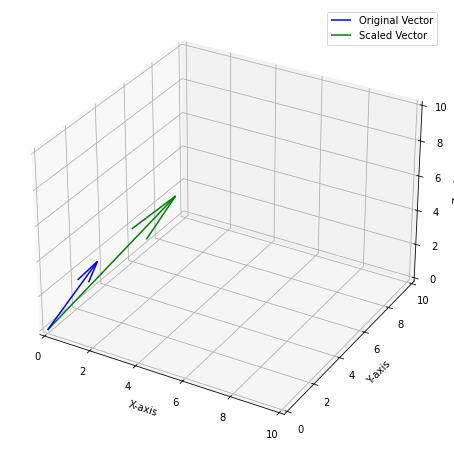

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def apply_scaling_3d(matrix, vector):
    # Apply scaling matrix
    scaled_vector = np.dot(matrix, vector)
    return scaled_vector

def plot_scaling_3d(scaling_matrix, original_vector):
    # Apply scaling
    scaled_vector = apply_scaling_3d(scaling_matrix, original_vector)

    # Print original and scaled vectors
    print("Original Vector:", original_vector)
    print("Scaled Vector:", scaled_vector)

    # Create a 3D plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the original vector
    ax.quiver(0, 0, 0, original_vector[0], original_vector[1], original_vector[2], color='b', label='Original Vector')
    
    # Plot the scaled vector
    ax.quiver(0, 0, 0, scaled_vector[0], scaled_vector[1], scaled_vector[2], color='g', label='Scaled Vector')

    # Set plot limits
    ax.set_xlim([0, 10])
    ax.set_ylim([0, 10])
    ax.set_zlim([0, 10])
    
    # Add labels and legend
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.legend()

    # Show the plot
    plt.show()

# Define scaling matrix for 3D
scaling_matrix_3d = np.array([[2, 0, 0, 0],
                              [0, 3, 0, 0],
                              [0, 0, 1.5, 0],
                              [0, 0, 0, 1]])

# Define the original 3D vector
original_vector_3d = np.array([1, 2, 3, 1])

# Plot the original and scaled vectors in 3D
plot_scaling_3d(scaling_matrix_3d, original_vector_3d)


Original Vector: [1 1 1]
Scaled Vector: [2 2 2]


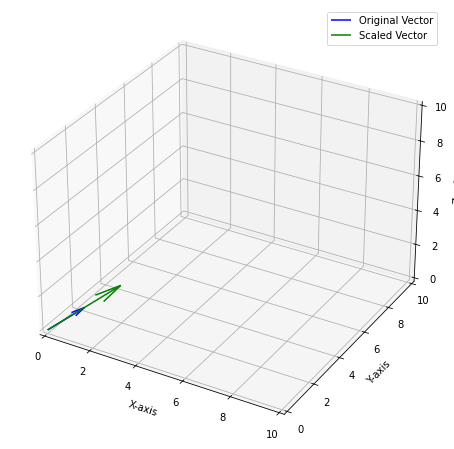

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def apply_scaling_3d(matrix, vector):
    # Apply scaling matrix
    scaled_vector = np.dot(matrix, vector)
    return scaled_vector

def plot_scaling_3d(scaling_matrix, original_vector):
    # Apply scaling
    scaled_vector = apply_scaling_3d(scaling_matrix, original_vector)

    # Print original and scaled vectors
    print("Original Vector:", original_vector)
    print("Scaled Vector:", scaled_vector)

    # Create a 3D plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the original vector
    ax.quiver(0, 0, 0, original_vector[0], original_vector[1], original_vector[2], color='b', label='Original Vector')
    
    # Plot the scaled vector
    ax.quiver(0, 0, 0, scaled_vector[0], scaled_vector[1], scaled_vector[2], color='g', label='Scaled Vector')

    # Set plot limits
    ax.set_xlim([0, 10])
    ax.set_ylim([0, 10])
    ax.set_zlim([0, 10])
    
    # Add labels and legend
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.legend()

    # Show the plot
    plt.show()

# Define scaling matrix for 3D
scaling_matrix_3d = np.array([[2, 0, 0],
                              [0, 2, 0],
                              [0, 0, 2]])

# Define the original 3D vector
original_vector_3d = np.array([1, 1, 1])

# Plot the original and scaled vectors in 3D
plot_scaling_3d(scaling_matrix_3d, original_vector_3d)


# b. Translation in 3D:

**3-D Translation:**<br>
$\hspace{2 cm}   \begin{bmatrix} x_2 \\ y_2 \\ z_2 \\1\end{bmatrix} = 
   \begin{bmatrix} 1 & 0 & 0 & t_x\\  0 & 1 & 0 & t_y \\ 0 & 0 & 1 & t_z \\ 0 & 0 & 0 & 1   \end{bmatrix} 
    \begin{bmatrix} x_1 \\ y_1 \\ z_1 \\1\end{bmatrix}
$

$\hspace{2 cm}x_2 = x_1 + t_x$

$\hspace{2 cm}y_2 = y_1 + t_y$

$\hspace{2 cm}z_2 = z_1 + t_z$

Original Vector: [1 2 3 1]
Translated Vector: [3 5 4 1]


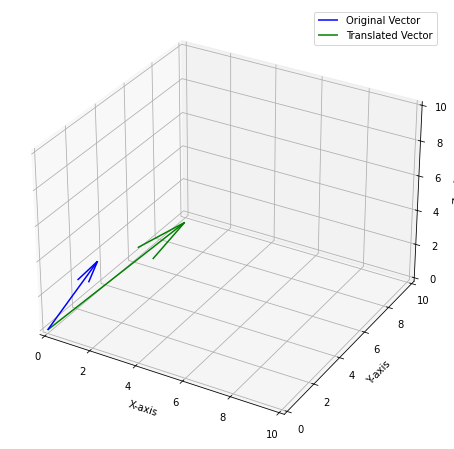

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def apply_translation_3d(matrix, vector):
    # Apply translation matrix
    translated_vector = np.dot(matrix, vector)
    return translated_vector

def plot_translation_3d(translation_matrix, original_vector):
    # Apply translation
    translated_vector = apply_translation_3d(translation_matrix, original_vector)

    # Print original and translated vectors
    print("Original Vector:", original_vector)
    print("Translated Vector:", translated_vector)

    # Create a 3D plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the original vector
    ax.quiver(0, 0, 0, original_vector[0], original_vector[1], original_vector[2], color='b', label='Original Vector')
    
    # Plot the translated vector
    ax.quiver(0, 0, 0, translated_vector[0], translated_vector[1], translated_vector[2], color='g', label='Translated Vector')

    # Set plot limits
    ax.set_xlim([0, 10])
    ax.set_ylim([0, 10])
    ax.set_zlim([0, 10])
    
    # Add labels and legend
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.legend()

    # Show the plot
    plt.show()

# Define translation matrix for 3D
translation_matrix_3d = np.array([[1, 0, 0, 2],
                                  [0, 1, 0, 3],
                                  [0, 0, 1, 1],
                                  [0, 0, 0, 1]])

# Define the original 3D vector
original_vector_3d = np.array([1, 2, 3, 1])

# Plot the original and translated vectors in 3D
plot_translation_3d(translation_matrix_3d, original_vector_3d)


Original Vector: [1 2 3]
Translated Vector: [1 2 3]


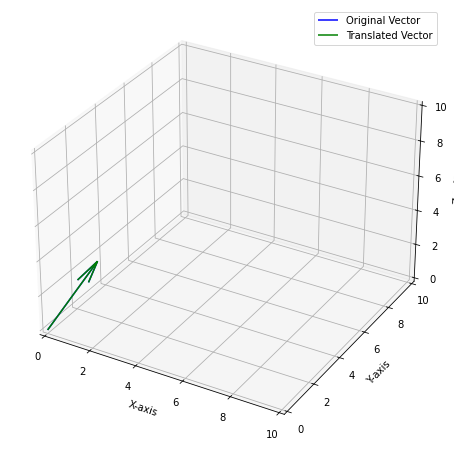

In [128]:
def apply_translation_3d(matrix, vector):
    # Apply translation matrix
    translated_vector = np.dot(matrix, vector)
    return translated_vector

def plot_translation_3d(translation_matrix, original_vector):
    # Apply translation
    translated_vector = apply_translation_3d(translation_matrix, original_vector)

    # Print original and translated vectors
    print("Original Vector:", original_vector)
    print("Translated Vector:", translated_vector)

    # Create a 3D plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the original vector
    ax.quiver(0, 0, 0, original_vector[0], original_vector[1], original_vector[2], color='b', label='Original Vector')
    
    # Plot the translated vector
    ax.quiver(0, 0, 0, translated_vector[0], translated_vector[1], translated_vector[2], color='g', label='Translated Vector')

    # Set plot limits
    ax.set_xlim([0, 10])
    ax.set_ylim([0, 10])
    ax.set_zlim([0, 10])
    
    # Add labels and legend
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.legend()

    # Show the plot
    plt.show()

# Define translation matrix for 3D
translation_matrix_3d = np.array([[1, 0, 0],
                                  [0, 1, 0],
                                  [0, 0, 1]])

# Define the original 3D vector
original_vector_3d = np.array([1, 2, 3])

# Plot the original and translated vectors in 3D
plot_translation_3d(translation_matrix_3d, original_vector_3d)


# c. Rotation in 3D:

Original Vector: [1 2 3]
Rotated Vector: [-0.70710678  2.12132034  3.        ]


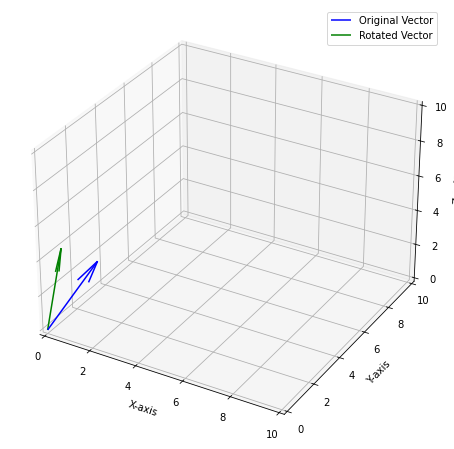

In [129]:
def apply_rotation_3d(matrix, vector):
    # Apply rotation matrix
    rotated_vector = np.dot(matrix, vector)
    return rotated_vector

def plot_rotation_3d(rotation_matrix, original_vector):
    # Apply rotation
    rotated_vector = apply_rotation_3d(rotation_matrix, original_vector)

    # Print original and rotated vectors
    print("Original Vector:", original_vector)
    print("Rotated Vector:", rotated_vector)

    # Create a 3D plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the original vector
    ax.quiver(0, 0, 0, original_vector[0], original_vector[1], original_vector[2], color='b', label='Original Vector')
    
    # Plot the rotated vector
    ax.quiver(0, 0, 0, rotated_vector[0], rotated_vector[1], rotated_vector[2], color='g', label='Rotated Vector')

    # Set plot limits
    ax.set_xlim([0, 10])
    ax.set_ylim([0, 10])
    ax.set_zlim([0, 10])
    
    # Add labels and legend
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.legend()

    # Show the plot
    plt.show()

# Define rotation matrix for 3D (45 degrees around Z-axis)
theta = 45 * np.pi / 180
rotation_matrix_3d = np.array([[np.cos(theta), -np.sin(theta), 0],
                               [np.sin(theta), np.cos(theta), 0],
                               [0, 0, 1]])

# Define the original 3D vector
original_vector_3d = np.array([1, 2, 3])

# Plot the original and rotated vectors in 3D
plot_rotation_3d(rotation_matrix_3d, original_vector_3d)


**3-D Counter Clockwise Rotation about Z-axis by an angle $\theta$:**<br><br>
$\hspace{2 cm}   \begin{bmatrix} x_2 \\ y_2 \\ z_2 \\1\end{bmatrix} = 
   \begin{bmatrix} cos\theta & -sin\theta & 0 & 0\\  sin\theta & cos\theta & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1   \end{bmatrix} 
    \begin{bmatrix} x_1 \\ y_1 \\ z_1 \\1\end{bmatrix}
$

$\hspace{2 cm}x_2 = x_1cos\theta - y_1sin\theta$

$\hspace{2 cm}y_2 = x_1sin\theta + y_1cos\theta$

$\hspace{2 cm}z_2 = z_1$

Original Vector: [1 2 3 1]
Rotated Vector: [-0.70710678  2.12132034  3.          1.        ]


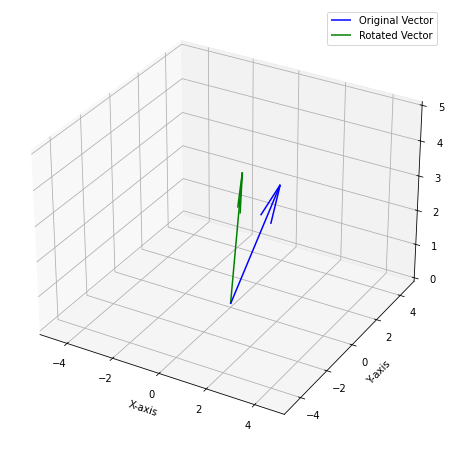

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def apply_rotation_3d(matrix, vector):
    # Apply rotation matrix
    rotated_vector = np.dot(matrix, vector)
    return rotated_vector

def plot_rotation_3d(rotation_matrix, original_vector):
    # Apply rotation
    rotated_vector = apply_rotation_3d(rotation_matrix, original_vector)

    # Print original and rotated vectors
    print("Original Vector:", original_vector)
    print("Rotated Vector:", rotated_vector)

    # Create a 3D plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the original vector
    ax.quiver(0, 0, 0, original_vector[0], original_vector[1], original_vector[2], color='b', label='Original Vector')
    
    # Plot the rotated vector
    ax.quiver(0, 0, 0, rotated_vector[0], rotated_vector[1], rotated_vector[2], color='g', label='Rotated Vector')

    # Set plot limits
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])
    ax.set_zlim([0, 5])
    
    # Add labels and legend
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.legend()

    # Show the plot
    plt.show()

# Define rotation angle (in radians)
theta = np.pi / 4

# Define rotation matrix for 3D about Z-axis
rotation_matrix_3d = np.array([[np.cos(theta), -np.sin(theta), 0, 0],
                               [np.sin(theta), np.cos(theta), 0, 0],
                               [0, 0, 1, 0],
                               [0, 0, 0, 1]])

# Define the original 3D vector
original_vector_3d = np.array([1, 2, 3, 1])

# Plot the original and rotated vectors in 3D
plot_rotation_3d(rotation_matrix_3d, original_vector_3d)


**3-D Counter Clockwise Rotation about X-axis by an angle $\gamma$:**<br><br>
$\hspace{2 cm}   \begin{bmatrix} x_2 \\ y_2 \\ z_2 \\1\end{bmatrix} = 
   \begin{bmatrix} 1 & 0 &0 & 0 \\ 0 & cos\gamma & -sin\gamma & 0 \\ 0 & sin\gamma & cos\gamma & 0 \\ 0 & 0 & 0& 1   \end{bmatrix} 
    \begin{bmatrix} x_1 \\ y_1 \\ z_1 \\1\end{bmatrix}
$

$\hspace{2 cm}x_2 = x_1$

$\hspace{2 cm}y_2 = y_1cos\gamma - z_1sin\gamma$

$\hspace{2 cm}z_2 = y_1sin\gamma + z_1cos\gamma$

Original Vector: [1 2 3 1]
Rotated Vector: [ 1.         -0.70710678  3.53553391  1.        ]


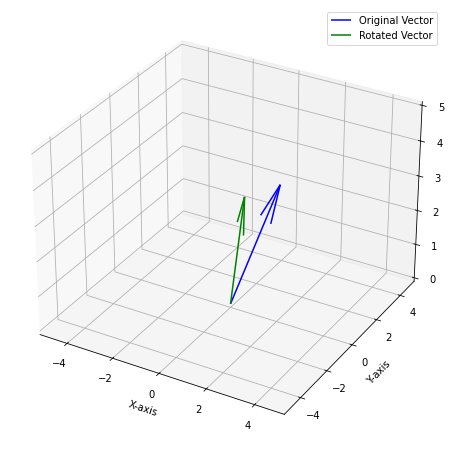

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def apply_rotation_3d(matrix, vector):
    # Apply rotation matrix
    rotated_vector = np.dot(matrix, vector)
    return rotated_vector

def plot_rotation_3d(rotation_matrix, original_vector):
    # Apply rotation
    rotated_vector = apply_rotation_3d(rotation_matrix, original_vector)

    # Print original and rotated vectors
    print("Original Vector:", original_vector)
    print("Rotated Vector:", rotated_vector)

    # Create a 3D plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the original vector
    ax.quiver(0, 0, 0, original_vector[0], original_vector[1], original_vector[2], color='b', label='Original Vector')
    
    # Plot the rotated vector
    ax.quiver(0, 0, 0, rotated_vector[0], rotated_vector[1], rotated_vector[2], color='g', label='Rotated Vector')

    # Set plot limits
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])
    ax.set_zlim([0, 5])
    
    # Add labels and legend
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.legend()

    # Show the plot
    plt.show()

# Define rotation angle (in radians)
gamma = np.pi / 4

# Define rotation matrix for 3D about X-axis
rotation_matrix_3d = np.array([[1, 0, 0, 0],
                               [0, np.cos(gamma), -np.sin(gamma), 0],
                               [0, np.sin(gamma), np.cos(gamma), 0],
                               [0, 0, 0, 1]])

# Define the original 3D vector
original_vector_3d = np.array([1, 2, 3, 1])

# Plot the original and rotated vectors in 3D
plot_rotation_3d(rotation_matrix_3d, original_vector_3d)


**3-D Counter Clockwise Rotation about Y-axis by an angle $\beta$:**<br><br>
$\hspace{2 cm}   \begin{bmatrix} x_2 \\ y_2 \\ z_2 \\1\end{bmatrix} = 
   \begin{bmatrix} cos\beta & 0 & sin\beta & 0 \\ 0 & 1  & 0 &1 \\ -sin\beta & 0 & cos\beta & 0 \\ 0&0&0&1\end{bmatrix} 
    \begin{bmatrix} x_1 \\ y_1 \\ z_1 \\1\end{bmatrix}
$

$\hspace{2 cm}x_2 = x_1cos\beta + z_1sin\beta$

$\hspace{2 cm}y_2 = y_1$

$\hspace{2 cm}z_2 = -x_1sin\beta + z_1cos\beta$

Original Vector: [1 2 3 1]
Rotated Vector: [2.82842712 2.         1.41421356 1.        ]


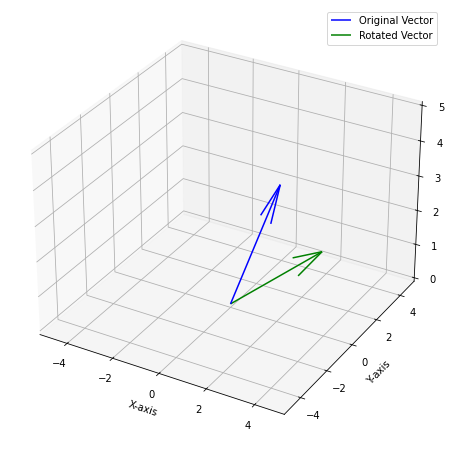

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def apply_rotation_3d(matrix, vector):
    # Apply rotation matrix
    rotated_vector = np.dot(matrix, vector)
    return rotated_vector

def plot_rotation_3d(rotation_matrix, original_vector):
    # Apply rotation
    rotated_vector = apply_rotation_3d(rotation_matrix, original_vector)

    # Print original and rotated vectors
    print("Original Vector:", original_vector)
    print("Rotated Vector:", rotated_vector)

    # Create a 3D plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the original vector
    ax.quiver(0, 0, 0, original_vector[0], original_vector[1], original_vector[2], color='b', label='Original Vector')
    
    # Plot the rotated vector
    ax.quiver(0, 0, 0, rotated_vector[0], rotated_vector[1], rotated_vector[2], color='g', label='Rotated Vector')

    # Set plot limits
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])
    ax.set_zlim([0, 5])
    
    # Add labels and legend
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.legend()

    # Show the plot
    plt.show()

# Define rotation angle (in radians)
beta = np.pi / 4

# Define rotation matrix for 3D about Y-axis
rotation_matrix_3d = np.array([[np.cos(beta), 0, np.sin(beta), 0],
                               [0, 1, 0, 0],
                               [-np.sin(beta), 0, np.cos(beta), 0],
                               [0, 0, 0, 1]])

# Define the original 3D vector
original_vector_3d = np.array([1, 2, 3, 1])

# Plot the original and rotated vectors in 3D
plot_rotation_3d(rotation_matrix_3d, original_vector_3d)


## Hierarchy of Transformations:
- **Isometric Transformations:** After any of these transformations (rotation/turn, reflection/flip or translation/slide), the shape still has the same size, area, angles and line lengths.
- **Similarity Transformation:** Includes above transformations plus scaling, so after this the object is resized. However, area, angles and line lengths remain same.
- **Affine Transformation** is any transformation that preserves co-linearity (i.e., all points lying on a line initially still lie on a line after transformation) and preserves ratios of distances (e.g., the midpoint of a line segment remains the midpoint after transformation).
- **Projective Transformation** is any transformation (camera image) in which parallelism, lengths and angles are not preserved.

### 1. Isometric Transformations:
- Isometric transformations include rotation, reflection, and translation. Here, I'll demonstrate rotation:

Original Point: [1 2]
Rotated Point: [-0.70710678  2.12132034]


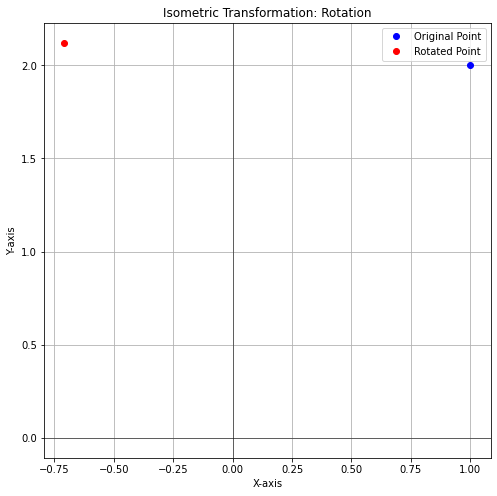

In [136]:
import numpy as np
import matplotlib.pyplot as plt

# Define a 2D point
point = np.array([1, 2])

# Define rotation matrix for 2D (45 degrees)
theta = np.pi / 4
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                            [np.sin(theta), np.cos(theta)]])

# Apply rotation
rotated_point = np.dot(rotation_matrix, point)

# Print original and rotated points
print("Original Point:", point)
print("Rotated Point:", rotated_point)

# Create a plot to visualize the transformation
plt.figure(figsize=(8, 8))
plt.plot(point[0], point[1], 'bo', label='Original Point')
plt.plot(rotated_point[0], rotated_point[1], 'ro', label='Rotated Point')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Isometric Transformation: Rotation')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()


### 2. Similarity Transformation:
Similarity transformations include scaling in addition to isometric transformations. I'll demonstrate scaling:

Original Point: [1 2]
Scaled Point: [2 4]


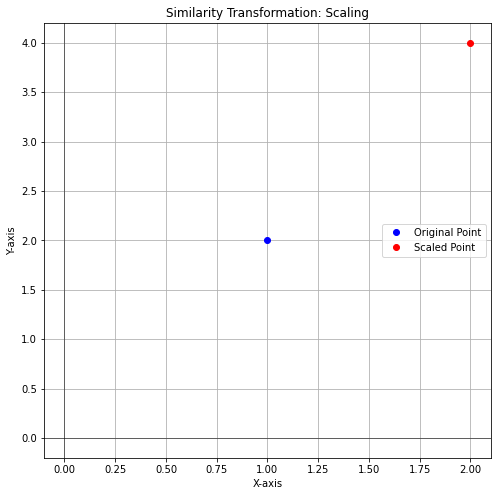

In [137]:
# Define scaling matrix for 2D (scaling by 2 in both x and y)
scaling_matrix = np.array([[2, 0],
                           [0, 2]])

# Apply scaling
scaled_point = np.dot(scaling_matrix, point)

# Print original and scaled points
print("Original Point:", point)
print("Scaled Point:", scaled_point)

# Create a plot to visualize the transformation
plt.figure(figsize=(8, 8))
plt.plot(point[0], point[1], 'bo', label='Original Point')
plt.plot(scaled_point[0], scaled_point[1], 'ro', label='Scaled Point')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Similarity Transformation: Scaling')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()


### 3. Affine Transformation:
Affine transformations include transformations that preserve co-linearity and ratios of distances. I'll demonstrate a simple affine transformation:

Original Point: [1 2]
Affine Transformed Point: [2. 2.]


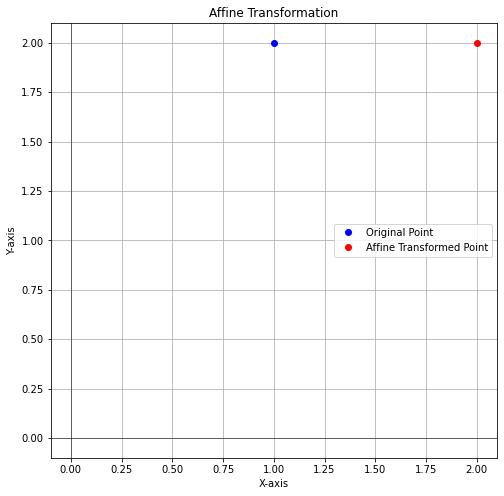

In [138]:
# Define affine matrix for 2D
affine_matrix = np.array([[1, 0.5],
                          [0, 1]])

# Apply affine transformation
affine_transformed_point = np.dot(affine_matrix, point)

# Print original and affine-transformed points
print("Original Point:", point)
print("Affine Transformed Point:", affine_transformed_point)

# Create a plot to visualize the transformation
plt.figure(figsize=(8, 8))
plt.plot(point[0], point[1], 'bo', label='Original Point')
plt.plot(affine_transformed_point[0], affine_transformed_point[1], 'ro', label='Affine Transformed Point')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Affine Transformation')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()


# Linear Transformations in 2D Space

## 1. Isometric Transformations

### Rotation

- **Matrix for Rotation (45 degrees):**
  $$ R = \begin{bmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{bmatrix} $$

- **Example:**
  - Apply rotation matrix on a 2D vector $\overrightarrow{v_1} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$. Calculate and graphically show the vector before and after the transformation.

---



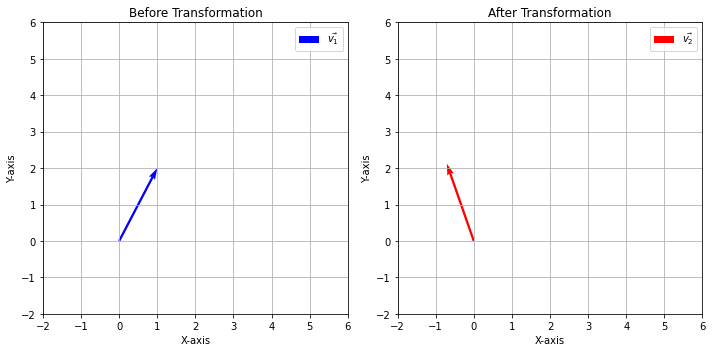

In [140]:
import numpy as np
import matplotlib.pyplot as plt

# Define the 2D vector v1
v1 = np.array([1, 2])

# Define the rotation angle in degrees
theta = 45

# Convert the angle to radians
theta_rad = np.radians(theta)

# Define the rotation matrix
rotation_matrix = np.array([[np.cos(theta_rad), -np.sin(theta_rad)],
                            [np.sin(theta_rad), np.cos(theta_rad)]])

# Apply the rotation matrix to the vector v1
v2 = np.dot(rotation_matrix, v1)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the vector before transformation
axs[0].quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='b', label=r'$\vec{v_1}$')
axs[0].set_xlim([-2, 6])
axs[0].set_ylim([-2, 6])
axs[0].set_title('Before Transformation')
axs[0].legend()

# Plot the vector after transformation
axs[1].quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='r', label=r'$\vec{v_2}$')
axs[1].set_xlim([-2, 6])
axs[1].set_ylim([-2, 6])
axs[1].set_title('After Transformation')
axs[1].legend()

# Set common labels for the subplots
for ax in axs:
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.grid()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## 2. Similarity Transformation

### Scaling

- **Matrix for Scaling:**
  $$ S = \begin{bmatrix} S_x & 0 \\ 0 & S_y \end{bmatrix} $$

- **Example:**
  - Apply scaling matrix on a 2D vector $\overrightarrow{v_1} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$. Calculate and graphically show the vector before and after the transformation.

---


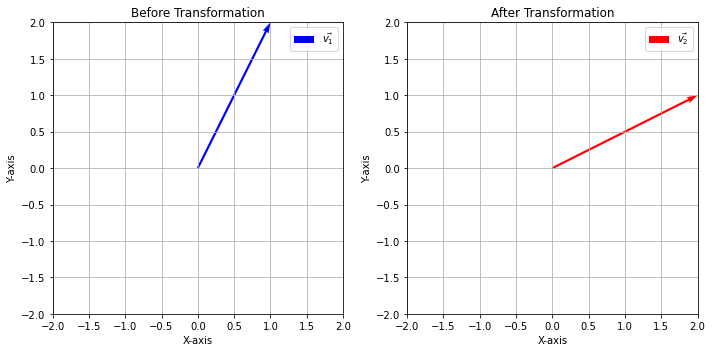

In [141]:
import numpy as np
import matplotlib.pyplot as plt

# Define the 2D vector v1
v1 = np.array([1, 2])

# Define the scaling factors
Sx, Sy = 2, 0.5

# Define the scaling matrix
scaling_matrix = np.array([[Sx, 0],
                           [0, Sy]])

# Apply the scaling matrix to the vector v1
v2 = np.dot(scaling_matrix, v1)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the vector before transformation
axs[0].quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='b', label=r'$\vec{v_1}$')
axs[0].set_xlim([-2, 2])
axs[0].set_ylim([-2, 2])
axs[0].set_title('Before Transformation')
axs[0].legend()

# Plot the vector after transformation
axs[1].quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='r', label=r'$\vec{v_2}$')
axs[1].set_xlim([-2, 2])
axs[1].set_ylim([-2, 2])
axs[1].set_title('After Transformation')
axs[1].legend()

# Set common labels for the subplots
for ax in axs:
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.grid()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



## 3. Affine Transformation

- **Affine Matrix:**
  $$ A = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix} $$

- **Example:**
  - Apply an affine matrix on a 2D vector $\overrightarrow{v_1} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$. Calculate and graphically show the vector before and after the transformation.







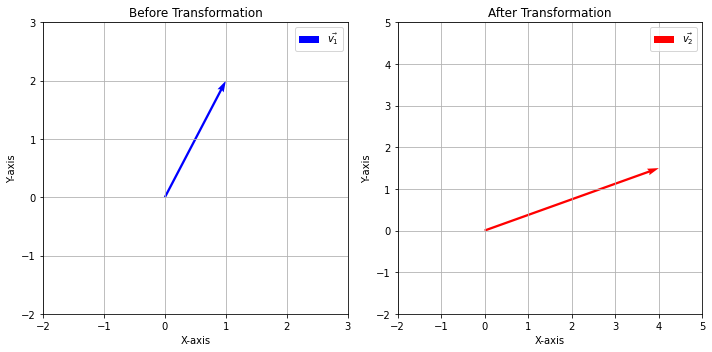

In [147]:
import numpy as np
import matplotlib.pyplot as plt

# Define the 2D vector v1
v1 = np.array([1, 2])

# Define the coefficients for the affine transformation
a, b, c, d = 2, 0.5, -1, 1.5

# Define the affine matrix
affine_matrix = np.array([[a, b],
                          [c, d]])

# Define the translation vector
translation_vector = np.array([1, -0.5])

# Apply the affine transformation to the vector v1
v2 = np.dot(affine_matrix, v1) + translation_vector

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the vector before transformation
axs[0].quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='b', label=r'$\vec{v_1}$')
axs[0].set_xlim([-2, 3])
axs[0].set_ylim([-2, 3])
axs[0].set_title('Before Transformation')
axs[0].legend()

# Plot the vector after transformation
axs[1].quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='r', label=r'$\vec{v_2}$')
axs[1].set_xlim([-2, 5])
axs[1].set_ylim([-2, 5])
axs[1].set_title('After Transformation')
axs[1].legend()

# Set common labels for the subplots
for ax in axs:
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.grid()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Counter Clockwise Rotation about X-axis

- **Rotation Matrix:**
  $$ R_{\text{X}} = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & \cos\gamma & -\sin\gamma & 0 \\ 0 & \sin\gamma & \cos\gamma & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix} $$

- **Example:**
  - Apply a 3D rotation matrix (X-axis) on a 3D vector $\overrightarrow{v_1} = \begin{bmatrix} x_1 \\ y_1 \\ z_1 \end{bmatrix}$. Calculate and graphically show the vector before and after the transformation.


Original 3D Vector (v1): [1 2 3]
3D Rotation Matrix (X-axis): [[ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]
 [ 0.          0.70710678  0.70710678]]
Transformed 3D Vector (v2): [ 1.         -0.70710678  3.53553391]


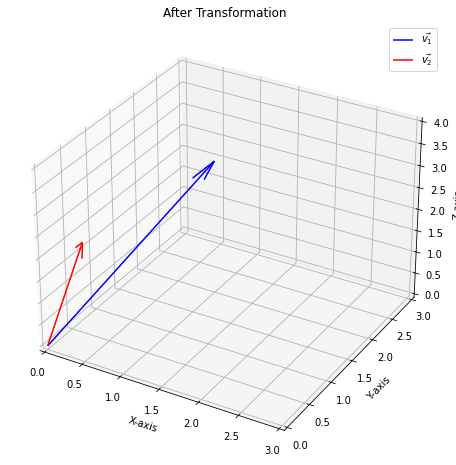

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the 3D vector v1
v1 = np.array([1, 2, 3])

# Define the rotation angle in radians
theta = np.pi/4  # 45 degrees

# Define the 3D rotation matrix (X-axis)
rotation_matrix = np.array([[1, 0, 0],
                            [0, np.cos(theta), -np.sin(theta)],
                            [0, np.sin(theta), np.cos(theta)]])

# Apply the rotation to the vector v1
v2 = np.dot(rotation_matrix, v1)

# Print the original and transformed vectors
print("Original 3D Vector (v1):", v1)
print("3D Rotation Matrix (X-axis):", rotation_matrix)
print("Transformed 3D Vector (v2):", v2)

# Plotting
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the vector before transformation
ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='b', label=r'$\vec{v_1}$', arrow_length_ratio=0.1)
ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_zlim([0, 4])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Before Transformation')
ax.legend()

# Plot the vector after transformation
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='r', label=r'$\vec{v_2}$', arrow_length_ratio=0.1)
ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_zlim([0, 4])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('After Transformation')
ax.legend()

# Show the plot
plt.show()


In [ ]:
### Counter Clockwise Rotation about Y-axis

- **Rotation Matrix:**
  $$ R_{\text{Y}} = \begin{bmatrix} \cos\beta & 0 & \sin\beta & 0 \\ 0 & 1 & 0 & 0 \\ -\sin\beta & 0 & \cos\beta & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix} $$

- **Example:**
  - Apply a 3D rotation matrix (Y-axis) on a 3D vector $\overrightarrow{v_1} = \begin{bmatrix} x_1 \\ y_1 \\ z_1 \end{bmatrix}$. Calculate and graphically show the vector before and after the transformation.

---


Original 3D Vector (v1): [1 2 3]
3D Rotation Matrix (Y-axis): [[ 0.70710678  0.          0.70710678]
 [ 0.          1.          0.        ]
 [-0.70710678  0.          0.70710678]]
Transformed 3D Vector (v2): [2.82842712 2.         1.41421356]


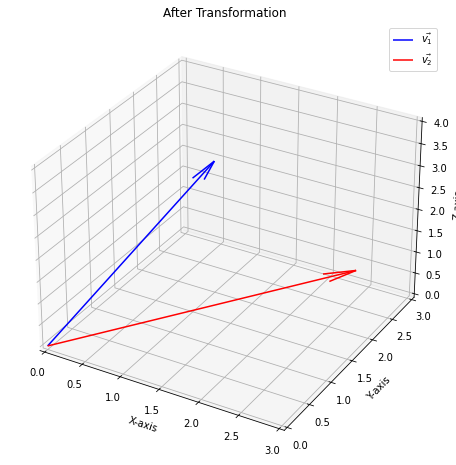

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the 3D vector v1
v1 = np.array([1, 2, 3])

# Define the rotation angle in radians
theta = np.pi/4  # 45 degrees

# Define the 3D rotation matrix (Y-axis)
rotation_matrix = np.array([[np.cos(theta), 0, np.sin(theta)],
                            [0, 1, 0],
                            [-np.sin(theta), 0, np.cos(theta)]])

# Apply the rotation to the vector v1
v2 = np.dot(rotation_matrix, v1)

# Print the original and transformed vectors
print("Original 3D Vector (v1):", v1)
print("3D Rotation Matrix (Y-axis):", rotation_matrix)
print("Transformed 3D Vector (v2):", v2)

# Plotting
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the vector before transformation
ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='b', label=r'$\vec{v_1}$', arrow_length_ratio=0.1)
ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_zlim([0, 4])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Before Transformation')
ax.legend()

# Plot the vector after transformation
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='r', label=r'$\vec{v_2}$', arrow_length_ratio=0.1)
ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_zlim([0, 4])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('After Transformation')
ax.legend()

# Show the plot
plt.show()


---

## 2. 3D Scaling

- **Scaling Matrix:**
  $$ S = \begin{bmatrix} S_x & 0 & 0 & 0 \\ 0 & S_y & 0 & 0 \\ 0 & 0 & S_z & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix} $$

- **Example:**
  - Apply a 3D scaling matrix on a 3D vector $\overrightarrow{v_1} = \begin{bmatrix} x_1 \\ y_1 \\ z_1 \end{bmatrix}$. Calculate and graphically show the vector before and after the transformation.

---



Original 3D Vector (v1): [1 2 3]
3D Scaling Matrix: [[2.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.  0.5]]
Transformed 3D Vector (v2): [2.  2.  1.5]


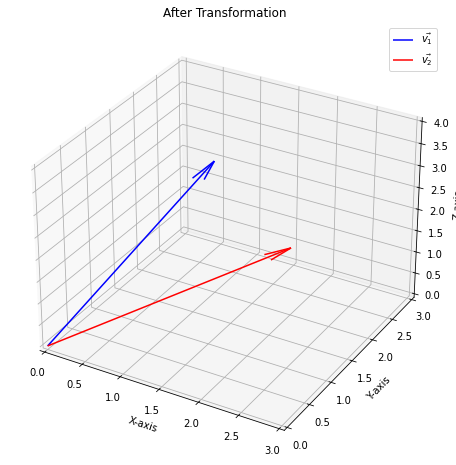

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the 3D vector v1
v1 = np.array([1, 2, 3])

# Define the scaling factors
Sx, Sy, Sz = 2, 1, 0.5

# Define the 3D scaling matrix
scaling_matrix = np.array([[Sx, 0, 0],
                           [0, Sy, 0],
                           [0, 0, Sz]])

# Apply the scaling to the vector v1
v2 = np.dot(scaling_matrix, v1)

# Print the original and transformed vectors
print("Original 3D Vector (v1):", v1)
print("3D Scaling Matrix:", scaling_matrix)
print("Transformed 3D Vector (v2):", v2)

# Plotting
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the vector before transformation
ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='b', label=r'$\vec{v_1}$', arrow_length_ratio=0.1)
ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_zlim([0, 4])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Before Transformation')
ax.legend()

# Plot the vector after transformation
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='r', label=r'$\vec{v_2}$', arrow_length_ratio=0.1)
ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_zlim([0, 4])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('After Transformation')
ax.legend()

# Show the plot
plt.show()


## 3. 3D Rotation

### Counter Clockwise Rotation about Z-axis

- **Rotation Matrix:**
  $$ R_{\text{Z}} 
= \begin{bmatrix} \cos\theta & -\sin\theta & 0 & 0 \\ \sin\theta & \cos\theta & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix} $$

- **Example:**
  - Apply a 3D rotation matrix (Z-axis) on a 3D vector $\overrightarrow{v_1} = \begin{bmatrix} x_1 \\ y_1 \\ z_1 \end{bmatrix}$. Calculate and graphically show the vector before and after the transformation.


Original 3D Vector (v1): [1 2 3]
3D Rotation Matrix (Z-axis, 45 degrees): [[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
Transformed 3D Vector (v2): [-0.70710678  2.12132034  3.        ]


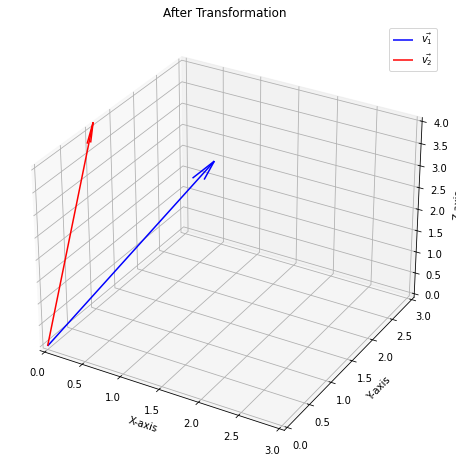

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the 3D vector v1
v1 = np.array([1, 2, 3])

# Define the rotation angle (in degrees)
theta = 45

# Convert the angle to radians
theta_rad = np.radians(theta)

# Define the 3D rotation matrix (Z-axis)
rotation_matrix = np.array([[np.cos(theta_rad), -np.sin(theta_rad), 0],
                            [np.sin(theta_rad), np.cos(theta_rad), 0],
                            [0, 0, 1]])

# Apply the rotation to the vector v1
v2 = np.dot(rotation_matrix, v1)

# Print the original and transformed vectors
print("Original 3D Vector (v1):", v1)
print(f"3D Rotation Matrix (Z-axis, {theta} degrees):", rotation_matrix)
print("Transformed 3D Vector (v2):", v2)

# Plotting
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the vector before transformation
ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='b', label=r'$\vec{v_1}$', arrow_length_ratio=0.1)
ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_zlim([0, 4])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Before Transformation')
ax.legend()

# Plot the vector after transformation
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='r', label=r'$\vec{v_2}$', arrow_length_ratio=0.1)
ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_zlim([0, 4])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('After Transformation')
ax.legend()

# Show the plot
plt.show()


---

## 4. Projective Transformation

- Projective transformations are more complex and typically involve perspective transformations in computer vision and graphics.

---



# Linear Transformations in 3D Space

## 1. 3D Translation

- **Translation Matrix:**
  $$ T = \begin{bmatrix} 1 & 0 & 0 & t_x \\ 0 & 1 & 0 & t_y \\ 0 & 0 & 1 & t_z \\ 0 & 0 & 0 & 1 \end{bmatrix} $$

- **Example:**
  - Apply a 3D translation matrix on a 3D vector $\overrightarrow{v_1} = \begin{bmatrix} x_1 \\ y_1 \\ z_1 \end{bmatrix}$. Calculate and graphically show the vector before and after the transformation.


Original 3D Vector (v1): [1 2 3]
3D Translation Matrix: [[ 1  0  0  2]
 [ 0  1  0 -1]
 [ 0  0  1  1]
 [ 0  0  0  1]]
Transformed 3D Vector (v2): [3 1 4]


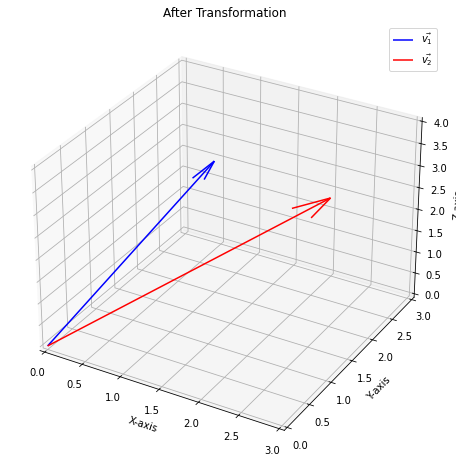

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the 3D vector v1
v1 = np.array([1, 2, 3])

# Define the translation vector
translation_vector = np.array([2, -1, 1])

# Define the 3D translation matrix
translation_matrix = np.array([[1, 0, 0, translation_vector[0]],
                               [0, 1, 0, translation_vector[1]],
                               [0, 0, 1, translation_vector[2]],
                               [0, 0, 0, 1]])

# Homogeneous coordinates for v1
v1_homogeneous = np.concatenate([v1, [1]])

# Apply the translation to the vector v1
v2_homogeneous = np.dot(translation_matrix, v1_homogeneous)

# Extract the 3D vector v2 from homogeneous coordinates
v2 = v2_homogeneous[:3]

# Print the original and transformed vectors
print("Original 3D Vector (v1):", v1)
print(f"3D Translation Matrix: {translation_matrix}")
print("Transformed 3D Vector (v2):", v2)

# Plotting
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the vector before transformation
ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='b', label=r'$\vec{v_1}$', arrow_length_ratio=0.1)
ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_zlim([0, 4])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Before Transformation')
ax.legend()

# Plot the vector after transformation
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='r', label=r'$\vec{v_2}$', arrow_length_ratio=0.1)
ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_zlim([0, 4])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('After Transformation')
ax.legend()

# Show the plot
plt.show()
